In [1]:
from pygmo import hypervolume
import pygmo as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
'hypervolume' in dir()

True

In [3]:
udp = pg.problem(pg.dtlz(prob_id = 2, dim = 10, fdim = 2))

In [4]:
pop = pg.population(udp, 50)

In [5]:
hv = hypervolume(pop)
hv

In [6]:
ref_point = [2,2,2,2,2]
hv = hypervolume([[1, 0, 0, 0, 1], [0, 1, 0, 0, 2],[0, 0, 1, 0, 0]] )
hv.compute(ref_point)

20.0

In [7]:
def read_solutions(file):

    points = []
    with open(file) as file:
        for line in file:
            point = []
            splitted_line = line.replace('\n','').replace('[','').replace(']','').split(',')
            try:
                x = float(splitted_line[0])
                y = float(splitted_line[1])
                z = float(splitted_line[2])
                w = float(splitted_line[3])
                t = float(splitted_line[4])
                point.append(x)
                point.append(y)
                point.append(z)
                point.append(w)
                point.append(t)
                points.append(point)
            except:
                pass

            
            
    return points

In [52]:
evaluations = 220000
executions = 30
step = 5000
start = 0
problem = 'AggDTLZ5_2'
ref_point = [3,3,3,3,3]
path = '/home/renansantos/NetBeansProjects/PhD_MOEAD/Results/'
file_path = path + 'AggDTLZ5-2' + '/'

df1 = pd.DataFrame(data=None)

for i in range(executions):
#     print('execution ',i)
    exec_hv = []
    for j in np.arange(start,evaluations,step):
        name = problem + '-' + str(i) + '-' + str(j) + '-solutions.csv'
        solutions = read_solutions(file_path + name)
        hv = hypervolume(solutions)
        exec_hv.append(hv.compute(ref_point))
    df1[i] = exec_hv

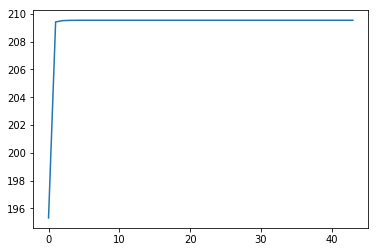

In [53]:
df1.mean(axis=1).plot()

In [54]:
evaluations = 220000
executions = 30
step = 5000
start = 0
problem = 'DTLZ5_5'
ref_point = [3,3,3,3,3]
path = '/home/renansantos/NetBeansProjects/PhD_MOEAD/Results/'
file_path = path + 'DTLZ5-5' + '/'

df2 = pd.DataFrame(data=None)

for i in range(executions):
#     print('execution ',i)
    exec_hv = []
    for j in np.arange(start,evaluations,step):
        name = problem + '-' + str(i) + '-' + str(j) + '-solutions.csv'
        solutions = read_solutions(file_path + name)
        hv = hypervolume(solutions)
        exec_hv.append(hv.compute(ref_point))
    df2[i] = exec_hv

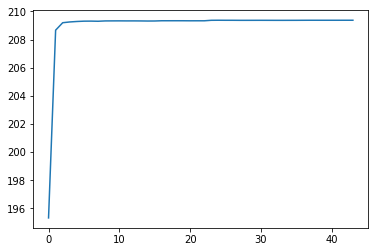

In [55]:
df2.mean(axis=1).plot()

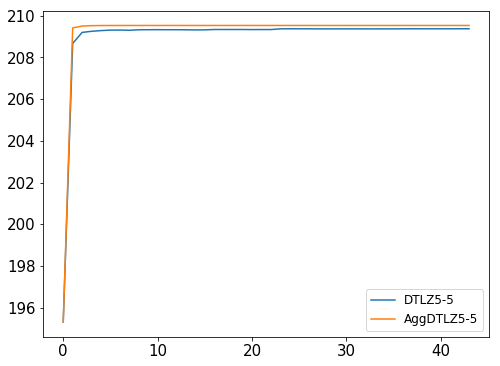

In [94]:
plt.figure(figsize=(8,6))
plt.plot(df2.mean(axis=1), label='DTLZ5-5')
plt.plot(df1.mean(axis=1), label='AggDTLZ5-5')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize = 'large')
plt.show()

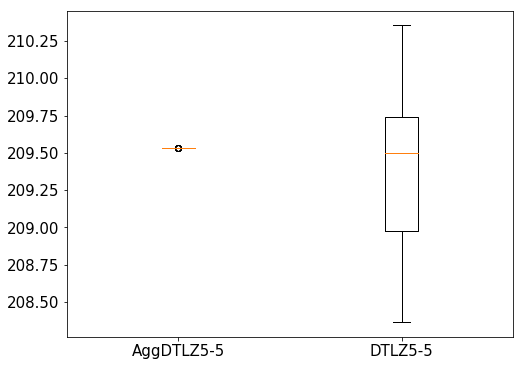

In [85]:
plt.figure(figsize=(8,6))
plt.boxplot([df1.loc[43],df2.loc[43]])
plt.xticks([1, 2], ['AggDTLZ5-5', 'DTLZ5-5'],fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### First implementation of Wilcoxon Test

In [75]:
last_hv = df1.shape[0] - 1
ndf1 = df1.loc[last_hv].values
ndf2 = df2.loc[last_hv].values
diff = ndf2 - ndf1
rank = [i + 1 for i in range(len(diff))]

In [79]:
wilcoxon = pd.DataFrame(data = [sorted(diff), rank]).T
wilcoxon.columns = 'Diff Rank'.split()

In [82]:
wilcoxon[wilcoxon['Diff'] > 0]['Rank'].sum()

465.0

In [47]:
np.lo

2.302585092994046

In [92]:
def get_hv(file_name):
    with open(file_name) as file:
        hv = []
        
        for line in file:
            hv.append(float(line))
            
    return pd.DataFrame(data=hv, columns=['HV'])

def random_test(df1, df2, plot_hist = True):
    DORAND = 10000
    
    spread2 = df2.values
    spread1 = df1.values
    
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)
    
    totalSpread = np.append(spread1.tolist(), spread2.tolist())
    
    randMedianSpreadDiff = np.nan * np.ones((DORAND,1))
    randMeanSpreadDiff = np.nan * np.ones((DORAND,1))
    
    for randPool in range(0, DORAND-1):
        new1Index = np.random.permutation(30)
        newSpread1 = totalSpread[new1Index[0:15]]
        newSpread2 = totalSpread[new1Index[15:30]]
        
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)
        
    randMedianSpreadDiff[DORAND - 1] = medianSpreadDiff
    randMeanSpreadDiff[DORAND - 1] = meanSpreadDiff
    
    z = (meanSpreadDiff - np.mean(randMeanSpreadDiff) )/ np.std(randMeanSpreadDiff)
        
    limiar = 1.96 * np.std(randMeanSpreadDiff) + np.mean(randMeanSpreadDiff)
    
    if z <= -1.96:
        print('H1-')
    elif z >= 1.96:
        print('H1+')
    else:
        print('H0')
    print('Limiar =',limiar)
    print('z =',z)
    print('Mean Spread Diff',meanSpreadDiff)
    if plot_hist:
        plt.figure(figsize=(10,6))
        plt.hist(randMeanSpreadDiff,bins=100,color='gray', label='Distribution')
        plt.scatter(x=meanSpreadDiff,y=0,color='red',s=100,label='Observed Mean Difference')
        plt.scatter(x=limiar,y=0,color='black',s=100,label='Confidence Limiars (95%)')
        plt.scatter(x=-limiar,y=0,color='black',s=100,)
        plt.xticks(fontsize=(13))
        plt.yticks(fontsize=(18))
        plt.legend(fontsize = 'large')
        plt.show()

H0
Limiar = 3.93321615567906e-06
z = 0.0020214226432436716
Mean Spread Diff 0.0


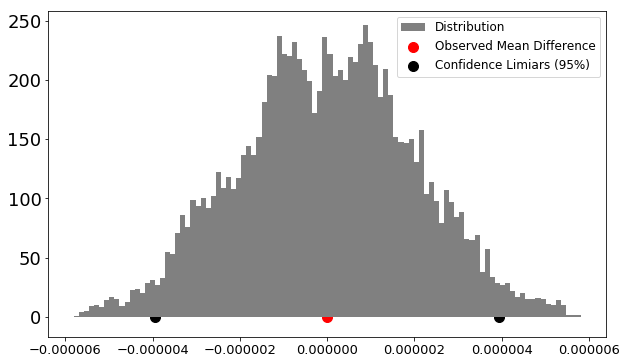

In [93]:
random_test(df1.loc[43], df1.loc[43], True)